# Restaurant Rating Prediction

#### Problem Statement
- The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
the Zomato Dataset and build an appropriate Machine Learning Model that will help
various Zomato Restaurants to predict their respective Ratings based on certain
features.

#### Column Description

<ul>
<li>url: contains the url of the restaurant in the zomato website

<li>address: contains the address of the restaurant in Bengaluru

<li>name: contains the name of the restaurant

<li>online_order: whether online ordering is available in the restaurant or not

<li>book_table: table book option available or not

<li>rate: contains the overall rating of the restaurant out of 5

<li>votes: contains total number of rating for the restaurant as of the above mentioned date

<li>phone: contains the phone number of the restaurant

<li>location: contains the neighborhood in which the restaurant is located

<li>rest_type: restaurant type

<li>dish_liked: dishes people liked in the restaurant

<li>cuisines: food styles, separated by comma

<li>approx_cost(for two people): contains the approximate cost for meal for two people

<li>reviews_list: list of tuples containing reviews for the restaurant, each tuple

<li>menu_item: contains list of menus available in the restaurant

<li>listed_in(type): type of meal

<li>listed_in(city): contains the neighborhood in which the restaurant is listed
    </ul>

## Importing Required Libraries

In [1]:
import numpy as np                              
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns              
%matplotlib inline
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [5]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Checking the Size of the Dataset

In [6]:
df.shape

(51717, 17)

51717 rows and 17 columns in our Dataset.

#### Checking the columns in the Dataset

In [7]:
df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Here, We have columns list, which is not required column so remove it and which is required column then work it.

#### Renaming Columns

In [8]:
# Rename the column name 
df.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'area'}, inplace = True)

### Data Cleaning
In Data cleaning we clean our data for wrong dtypes, handling null values, irrelevant columns, outliers etc.

#### Dropping Irrelevant Columns

In [9]:
df.drop(['url', 'address','menu_item', 'reviews_list', 'dish_liked', 'phone', 'listed_in(type)'], axis = 1, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


#### Checking and Handling the Datatypes

In [10]:
# checking the information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In this Inforamtion we can see that the columns
rate, location, rest_type, approx_cost, cuisines 
we have null values and worng dtypes or both.

#### Rate Column

In [11]:
# Checking the unique values in rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)


above output shows that there are many null values and garbage values.

In [12]:
# Replace the all null values and garbage values and then covert into numbers
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [13]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [14]:
# In rate column datatyep changing object to float
df['rate'] = df['rate'].astype(float)

#### Approx Cost Column

In [15]:
# Checking the unique values in approx column 
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
# Replacing thr null values and convert
df['approx_cost'] =  df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] =  df['approx_cost'].fillna('NaN')
df['approx_cost'] =  df['approx_cost'].str.replace(",", "")

In [17]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
# chaning the dtype of the column from object to float
df['approx_cost'] = df['approx_cost'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


#### Checking for Null Values

In [20]:
# Checking the number of null values 
df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [21]:
# Checking of Percentage of null values in Column
(df.isna().sum() / df.shape[0]) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

Here, the column is location, rest_type, cuisines, approx_cost have less number of null values as compared to rate column. So, we can drop a null values.

In [22]:
# we droping the null values from which columns have less number of null values.
df = df[df["location"].notna()]
df = df[df["rest_type"].notna()]
df = df[df["cuisines"].notna()]
df = df[df["approx_cost"].notna()]

df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

#### Handling Null values in Rate Column

in this rate column has greater number of null values, so we can droping them, and than we will impute with mean,median and mode.

In [23]:
# statistics method
df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [25]:
# For imputing the values, we will check for outliers
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)

xyz = q3 - q1

lower_range = q1 - (1.5 * xyz)
upper_range = q3 + (1.5 * xyz)

outliers = len(df[(df['rate'] < lower_range) | (df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


above the output , we can see that 183 rows having outliers, but we are all know rating is always in the range from 1 to 5, so we will impute with meadin.

In [26]:
# Imputing the null values with median
df['rate'] = df['rate'].fillna(df['rate'].median())

df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [27]:
# Reset the index
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

## Data Visualization

#### No. of orders vs Restaurants

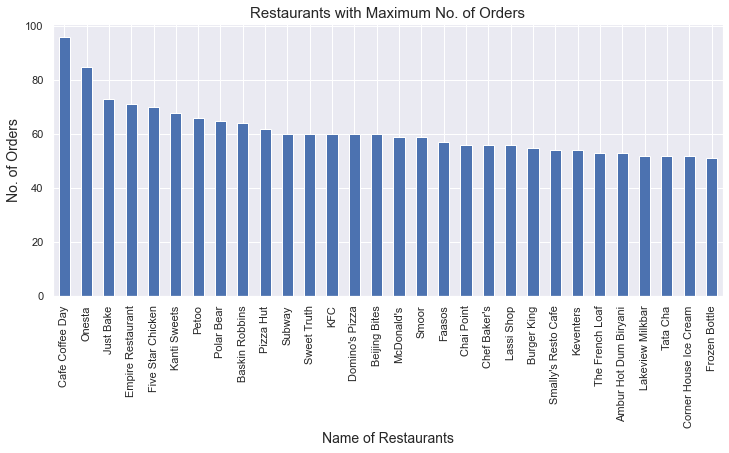

In [28]:
# Checking for the Restaurants got higher number of orders
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

Above chart we can see comparision between Restaurant name and number of orders, which restaurant have a highest number of orders. 

#### Number of Restaurants having Online Order Facility

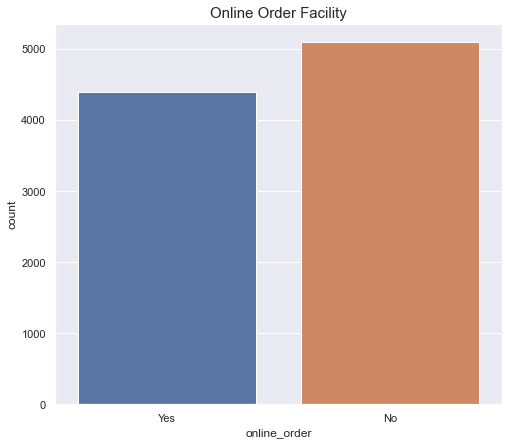

In [29]:
# Checking the number of restaurants having Online Order Facility
data = df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,7))
fx = sns.countplot(x="online_order", data=data).set_title('Online Order Facility',fontsize = 15)
plt.show()

From above chart, we can see that only 4397 restaurants have Order Facility.

#### Number of restaurants having Prebooking Table Facility

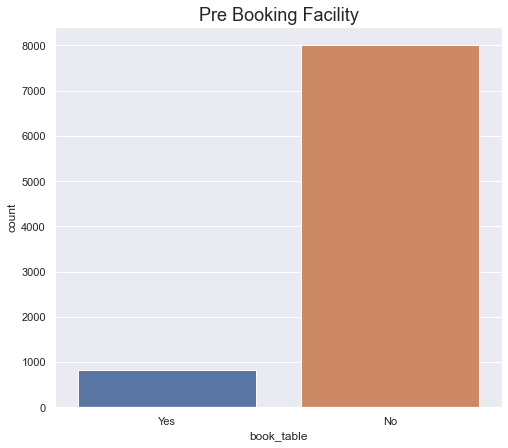

In [30]:
# Checking the number of restaurants having Prebooking Table Facility
data = df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,7))
fx = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 18)
plt.show()

From above chart, we can see the most of the restauratns doesn't have Booking table facility, only 820 restauranth having table booking facility.

#### Top Locations got Higher Number of Orders

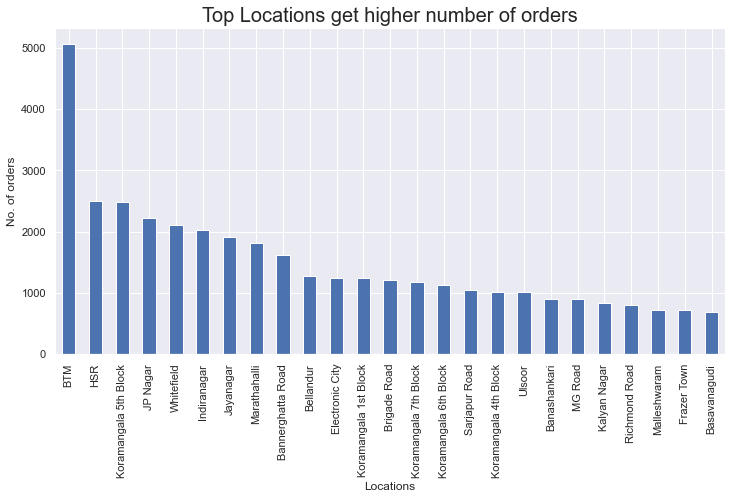

In [34]:
# Checking top Locations got Higher Number of Orders
plt.figure(figsize = (12,6))
data = df.location.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('No. of orders')
plt.title ('Top Locations get higher number of orders', size = 20)
plt.show()

Above chart we can see Location BTM get higher number of orders amoung all others locations.  

#### Most Common Ratings for orders

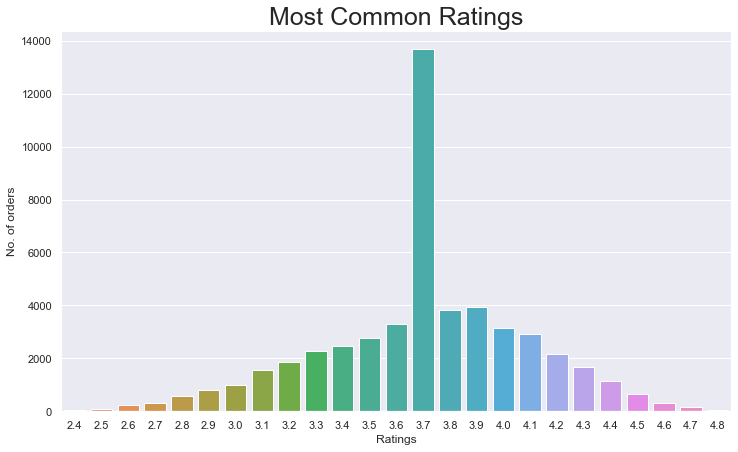

In [41]:
# Checking the most Common ratings for orders
data = df.rate.value_counts().reset_index()[0:25]

plt.figure(figsize = (12,7))
sns.barplot(x = data['index'], y = data['rate'])
plt.xlabel('Ratings')
plt.ylabel('No. of orders')
plt.title ('Most Common Ratings', size = 25)
plt.show()

We can see that maximum number of orders got 3.7 rating for their restaurants.

#### Common Approximate Costs for meal of two people 

In [42]:
# Here Approximate costs for meal
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')

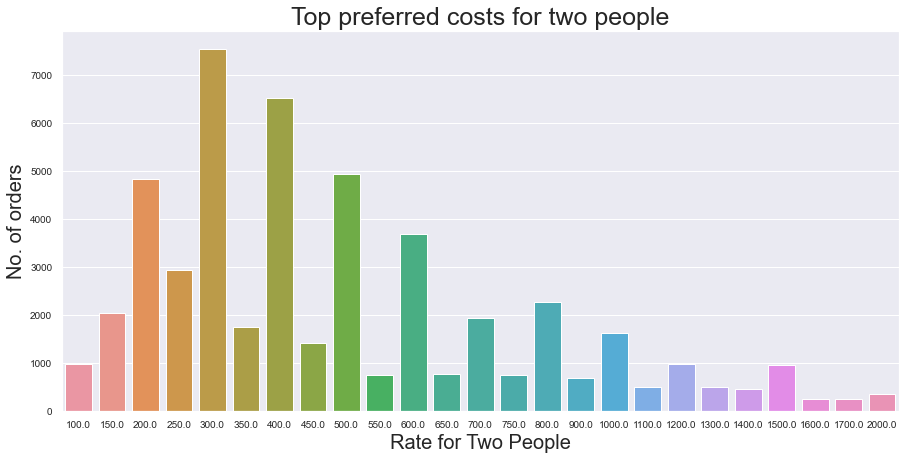

In [43]:
plt.figure(figsize = (15, 7))
sns.barplot(x = data.index, y=data['count'])
plt.xlabel('Rate for Two People', size=20)
plt.ylabel('No. of orders', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people', size = 25)
plt.show()

### Restaurant Type vs No. of orders

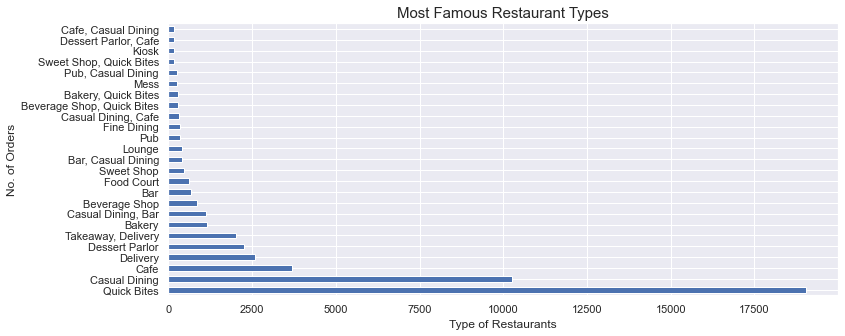

In [52]:
plt.figure(figsize=(12,5))
abc = df.rest_type.value_counts()[:25]
abc.plot(kind='barh')
plt.title("Most Famous Restaurant Types",fontsize=15)
plt.xlabel("Type of Restaurants")
plt.ylabel("No. of Orders")
plt.show()

#### Most famous Cusines among People

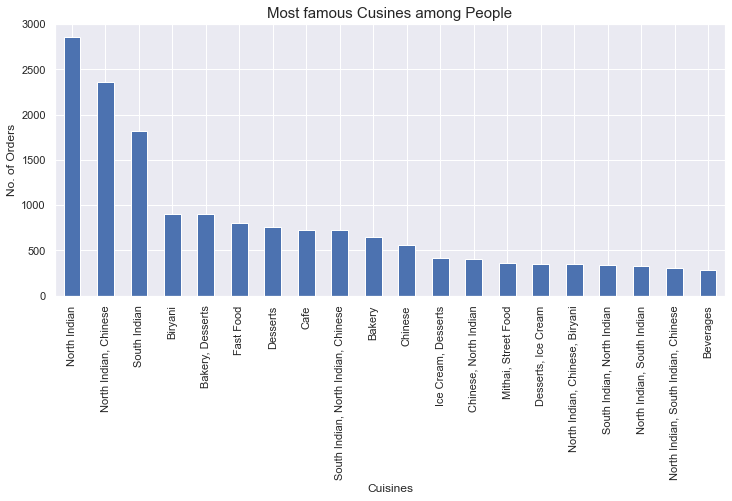

In [53]:
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='bar')
plt.title("Most famous Cusines among People",fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel ("No. of Orders")
plt.show()

#### Top Locations with Most Number of Restaurants

In [54]:
loc = pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by='count', ascending= False, inplace=True)

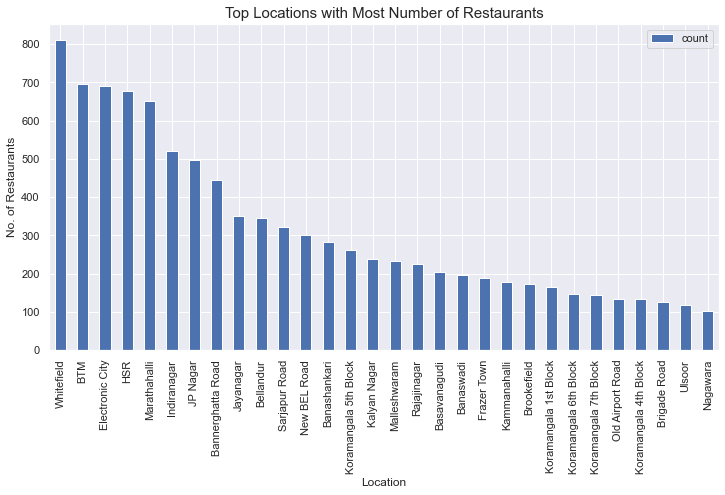

In [55]:
plt.rcParams['figure.figsize'] = (12,6)
ax = loc[0:30].plot(kind='bar')
plt.xlabel('Location', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

## Encoding Columns

#### Online Order Column

In [56]:
df['online_order'] = df['online_order'].replace({"Yes": 1, "No" : 0})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


#### Book Table Column

In [58]:
df['book_table'] = df['book_table'].replace({"Yes": 1, "No" : 0})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


#### Rest Type Column

In [59]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Dhaba,Quick Bites,Food Truck,Meat Shop,Microbrewery,Beverage Shop,Confectionery,Bar,Casual Dining,...,Kiosk,Delivery,Irani Cafee,Dessert Parlor,Sweet Shop,Food Court,Pop Up,Mess,Pub,Club
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [61]:
rest_df.head()

,rest_type,Dhaba,Quick Bites,Food Truck,Meat Shop,Microbrewery,Beverage Shop,Confectionery,Bar,Casual Dining,...,Kiosk,Delivery,Irani Cafee,Dessert Parlor,Sweet Shop,Food Court,Pop Up,Mess,Pub,Club
0,Casual Dining,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
rest_df.drop(['rest_type'], axis = 1, inplace=True)
rest_df.head()

,Dhaba,Quick Bites,Food Truck,Meat Shop,Microbrewery,Beverage Shop,Confectionery,Bar,Casual Dining,Fine Dining,...,Kiosk,Delivery,Irani Cafee,Dessert Parlor,Sweet Shop,Food Court,Pop Up,Mess,Pub,Club
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Cuisines Column

In [63]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Tamil,Bar Food,Konkan,Indonesian,Turkish,Biryani,Tibetan,Salad,Mithai,...,Juices,Andhra,Kerala,Sandwich,Afghan,Lucknowi,Tex-Mex,Spanish,Russian,Healthy Food
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))

In [65]:
count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1

In [66]:
cuisines_df.head()

,cuisines,Tamil,Bar Food,Konkan,Indonesian,Turkish,Biryani,Tibetan,Salad,Mithai,...,Juices,Andhra,Kerala,Sandwich,Afghan,Lucknowi,Tex-Mex,Spanish,Russian,Healthy Food
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Tamil,Bar Food,Konkan,Indonesian,Turkish,Biryani,Tibetan,Salad,Mithai,Rolls,...,Juices,Andhra,Kerala,Sandwich,Afghan,Lucknowi,Tex-Mex,Spanish,Russian,Healthy Food
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Location Column

In [68]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Area Column

In [69]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
#data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


## Feature Selection

In [74]:
x1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values

print("X = ", x1)
print("Y = ", y1)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   1. 236. ...   0.   0.   0.]
 [  0.   0.  13. ...   0.   0.   0.]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [75]:
x2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values

print("X = ", x2)
print()
print("Y = ", y2)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   1. 236. ...   0.   0.   1.]
 [  0.   0.  13. ...   0.   0.   1.]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [76]:
from sklearn.ensemble import ExtraTreesRegressor

In [77]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

[1.71127154e-02 1.67131920e-01 2.87911453e-01 4.91515243e-02
 1.93343219e-04 1.00931038e-02 9.43569220e-05 2.62486530e-06
 9.58043369e-04 1.17795909e-03 1.06021063e-05 2.73094887e-03
 1.04415861e-02 5.39262969e-04 2.88735721e-03 1.33832108e-02
 3.34441113e-03 2.98630369e-03 6.34126410e-07 3.62744341e-04
 5.45441019e-03 2.69593737e-07 3.61170081e-03 7.50277176e-04
 3.41953118e-03 2.18662066e-18 9.40113535e-04 1.60765045e-03
 6.50497847e-05 6.74248466e-05 1.21424878e-04 9.75367062e-05
 9.25438633e-05 3.52019231e-04 1.04755949e-02 1.46135213e-03
 2.98322399e-03 1.40323063e-03 3.85674407e-03 2.03336959e-04
 2.94977032e-06 3.21534308e-05 4.71561348e-03 1.61509324e-06
 2.64015714e-03 1.61708495e-05 6.30276837e-06 6.07056101e-04
 2.55815255e-04 1.04255671e-03 7.61628180e-06 1.66751776e-04
 3.19515856e-04 1.57876218e-03 2.55294894e-04 6.39242466e-05
 3.44571824e-03 1.89832708e-05 3.76894369e-03 3.46477103e-05
 4.37426652e-06 1.28901396e-05 1.28348831e-02 3.80322281e-04
 1.48275352e-04 5.446420

<AxesSubplot: >

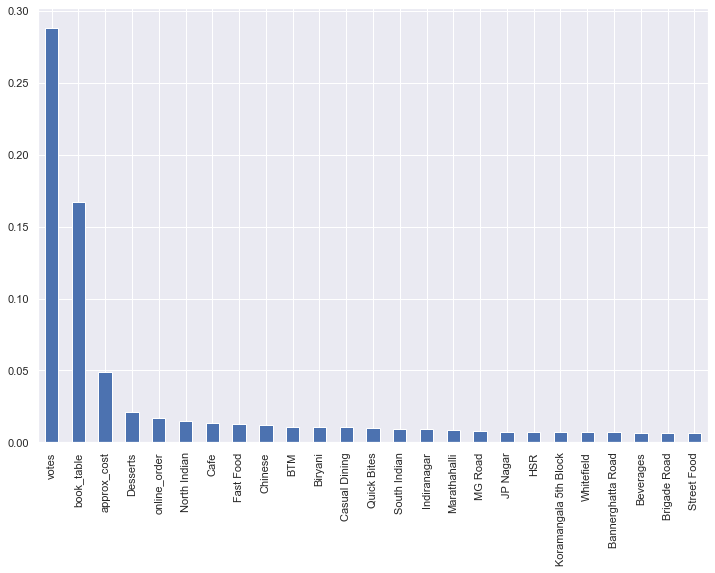

In [80]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

In [79]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2, y2)
print(imp_features2.feature_importances_)

[ 2.14862974e-02  1.65855282e-01  3.20544223e-01  7.13708138e-02
  2.10842769e-04  1.26266183e-02  2.11333048e-04  9.01201663e-06
  1.04594266e-03  1.71605508e-03  1.84495115e-05  3.48269000e-03
  1.17745166e-02  7.54304468e-04  4.04432324e-03  1.40996185e-02
  4.00775705e-03  3.69491819e-03  6.42998196e-07  5.00591403e-04
  6.33510001e-03  2.98980273e-06  3.90447682e-03  9.22259457e-04
  3.94235474e-03  3.83310807e-16  1.31304858e-03  2.95644570e-03
  9.42603054e-05  5.91177316e-05  2.92595112e-04  1.46531228e-04
  1.37895266e-04  5.21060618e-04  1.25629771e-02  1.99419646e-03
  3.39012852e-03  2.12413018e-03  5.39206748e-03  2.14047310e-04
  6.44300046e-06  3.29923185e-05  6.69769751e-03  2.98070468e-07
  3.45396680e-03  2.04365683e-05  1.15177081e-05  6.46193320e-04
  3.14260063e-04  1.31888772e-03  6.38217262e-06  2.24687549e-04
  3.80510866e-04  1.94989507e-03  2.60011376e-04  7.57295119e-05
  3.49635527e-03  4.94938178e-05  5.41691829e-03  5.48918120e-05
  2.63521122e-05  1.64526

<AxesSubplot: >

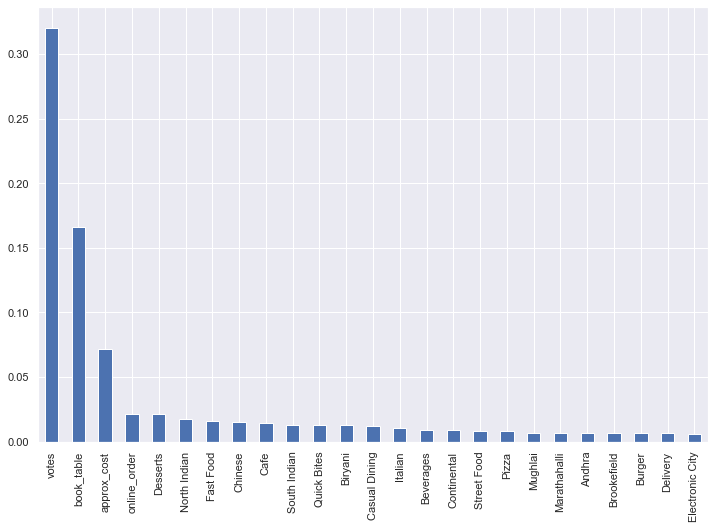

In [81]:
plt.figure(figsize = (12,8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

### Train Test Splitting of Data

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [84]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)

### Importing ML Models

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#### Linear Regression

#### For data_with_location

In [86]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [87]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:100]

array([3.59842095, 3.79314729, 3.58246313, 3.48453781, 3.54911858,
       3.86078185, 3.57360405, 3.49362775, 3.86837198, 3.53854682,
       3.53894707, 3.66695723, 3.52999025, 3.61098495, 4.13777133,
       3.38109923, 3.79516245, 4.33883224, 3.50354697, 3.429606  ,
       3.45267673, 3.47351886, 3.84281261, 3.61792553, 3.51014983,
       3.53499089, 3.84186274, 3.78805962, 3.64354086, 3.51003124,
       3.63136543, 3.68449124, 3.94075469, 3.7367096 , 3.50586451,
       3.46090123, 4.49197891, 3.5768909 , 3.44830891, 3.79047545,
       3.61026277, 3.80753047, 3.55868624, 3.77055884, 3.4899659 ,
       3.60305986, 3.62821693, 3.49645813, 4.43527374, 4.16001406,
       3.51686224, 4.42523589, 3.63541475, 3.43397489, 3.61012108,
       3.72063299, 3.59530734, 3.54345125, 3.62358271, 3.52398522,
       3.76933367, 3.82226402, 3.48584428, 3.65376135, 4.02413128,
       4.30118549, 3.48148102, 3.61607414, 3.76684806, 3.50513566,
       3.66760143, 3.47916749, 3.60942462, 3.53674262, 3.44939

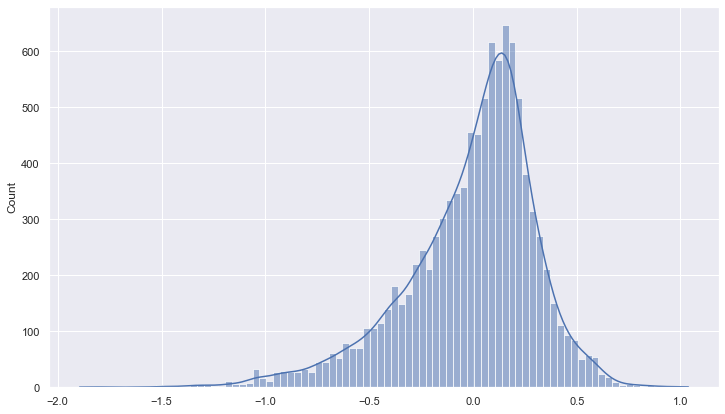

In [91]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()

#### For data_with_area

In [92]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [93]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:100]

array([3.51048882, 3.64624727, 3.91010291, 3.5310687 , 3.63902146,
       3.50307539, 4.12011187, 3.80908364, 3.67520392, 3.50085444,
       3.60862335, 3.70999879, 3.67316422, 4.08726229, 3.65341947,
       3.65980031, 4.04504739, 3.58494806, 4.14987018, 3.58862444,
       3.64562671, 3.83260972, 3.50762822, 3.68342688, 3.70324063,
       3.95263685, 4.13305177, 3.46835315, 3.47583025, 3.63654953,
       3.72160944, 3.69534413, 3.8050545 , 3.77048172, 3.53513794,
       3.48923858, 4.28697051, 3.50903821, 3.75349993, 3.69338207,
       3.70443475, 3.60136421, 4.05891546, 3.61024504, 3.55934397,
       3.81244436, 3.81456064, 3.50414448, 3.43098915, 3.51496927,
       3.50303322, 3.82541065, 3.83833245, 3.52617849, 3.85815489,
       3.84711823, 3.57644781, 3.67179775, 3.55948445, 3.57708213,
       3.63459424, 4.12782089, 3.59805804, 3.48051497, 4.20969075,
       3.78838586, 3.97159693, 3.64282754, 3.63616819, 3.78291687,
       3.67089778, 3.88598112, 3.53337802, 3.78804375, 3.50613

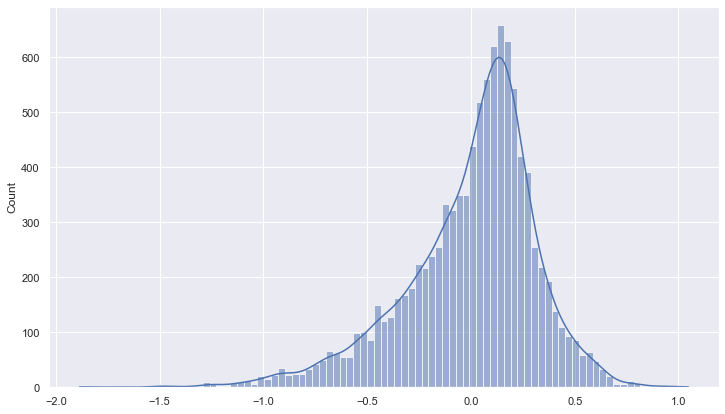

In [96]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test-Y_lr2, kde=True)
plt.show()

### Random Forest Regression

#### For data_with_location

In [97]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [98]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.2152    , 3.55744444, 3.7       , 3.18554545, 3.2563    ,
       4.101     , 3.59333333, 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.344     ,
       3.309625  , 3.9565    , 4.2       , 3.7       , 3.2       ,
       3.168     , 3.7       , 3.7       , 3.7481619 , 3.579     ,
       3.84336667, 3.7       , 4.3       , 3.5       , 3.359     ,
       3.506     , 3.34145238, 4.2       , 4.389     , 4.        ,
       3.2172    , 4.432     , 3.474     , 3.7       , 4.132     ,
       3.799     , 3.7       , 3.6125    , 4.146     , 3.415     ,
       3.5875    , 4.008     , 3.271     , 4.4       , 4.199     ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.858     , 3.3       , 3.83071429, 3.7       , 3.7       ,
       3.7       , 3.882     , 2.891     , 3.63      , 4.        ,
       4.10858333, 3.288     , 3.104     , 3.972     , 3.305     ,
       3.7       , 3.68      , 3.598     , 3.3527    , 3.527  

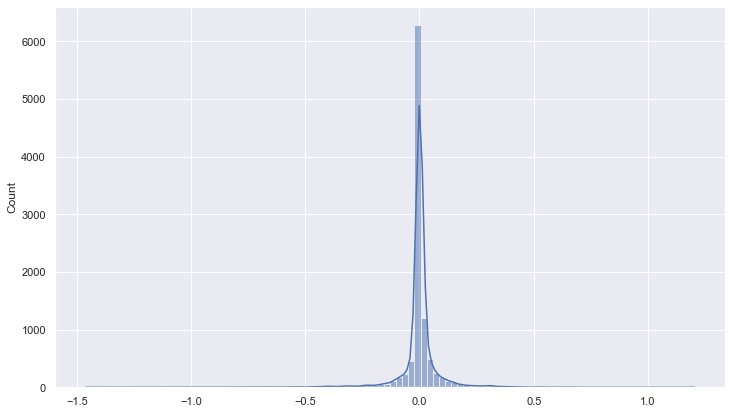

In [100]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test-Y_rf1, kde=True, bins=100)
plt.show()

#### For data_with_area

In [101]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [102]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.093     , 4.3       , 3.189     , 3.365     ,
       3.7       , 4.199     , 4.195     , 3.109     , 3.806     ,
       3.474     , 3.7       , 3.7       , 4.188     , 3.676     ,
       3.302     , 4.412     , 3.782     , 4.275     , 3.7       ,
       4.185     , 3.997     , 3.314     , 3.901     , 3.7       ,
       4.29      , 4.103     , 3.48033333, 3.7       , 3.7       ,
       3.601     , 3.895     , 4.072     , 3.898     , 3.7       ,
       3.212     , 4.503     , 3.146     , 3.059     , 3.5       ,
       2.87      , 3.978     , 4.542     , 3.7       , 3.7       ,
       4.099     , 3.917     , 2.875     , 3.613     , 3.553     ,
       3.007     , 4.048     , 3.7       , 3.01      , 3.704     ,
       3.9       , 3.588     , 3.818     , 3.7       , 3.393     ,
       3.422     , 4.201     , 3.88475   , 3.7       , 4.4       ,
       4.002     , 4.032     , 3.711     , 3.438     , 3.868     ,
       3.18731429, 4.1       , 3.7       , 3.69632857, 3.73   

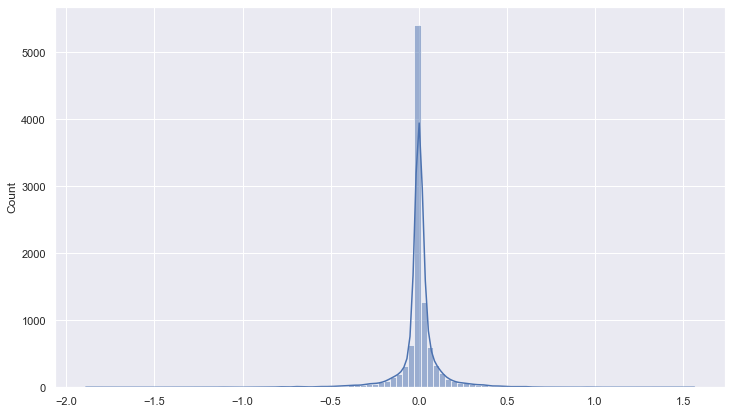

In [104]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

### Decision Tree Regressor

#### For data_with_location

In [105]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [106]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.2       , 2.9       , 3.7       , 3.2       , 3.2       ,
       4.1       , 3.6       , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.4       ,
       3.2       , 4.05      , 4.2       , 3.7       , 3.2       ,
       3.1       , 3.7       , 3.7       , 3.75      , 3.6       ,
       3.85      , 3.7       , 4.3       , 3.5       , 3.4       ,
       3.5       , 3.43333333, 4.2       , 4.4       , 4.        ,
       3.1       , 4.4       , 3.5       , 3.7       , 4.1       ,
       3.8       , 3.7       , 3.5       , 3.9       , 3.7       ,
       3.6       , 4.        , 3.3       , 4.4       , 4.2       ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.9       , 3.3       , 3.9       , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.9       , 3.7       , 4.        ,
       4.1       , 3.3       , 3.1       , 4.        , 3.3       ,
       3.7       , 3.7       , 3.6       , 3.5       , 3.6    

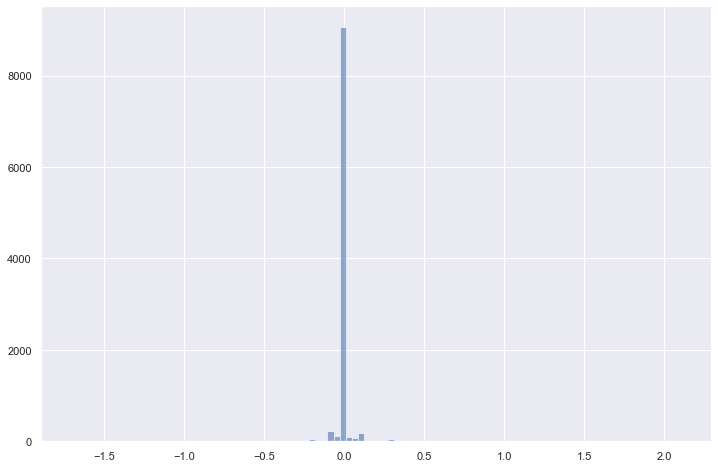

In [113]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test-Y_dt1, bins=100, alpha=0.6)
plt.show()

#### For data_with_area

In [114]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [116]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7 , 4.1 , 4.3 , 3.  , 3.5 , 3.7 , 4.2 , 4.2 , 3.1 , 3.9 , 3.7 ,
       3.7 , 3.7 , 4.2 , 3.7 , 3.3 , 4.4 , 2.8 , 4.3 , 3.7 , 4.2 , 4.  ,
       3.2 , 3.9 , 3.7 , 4.3 , 4.1 , 3.5 , 3.7 , 3.7 , 3.6 , 3.9 , 4.1 ,
       3.9 , 3.7 , 3.3 , 4.5 , 3.1 , 2.8 , 3.5 , 2.8 , 3.8 , 4.6 , 3.7 ,
       3.7 , 4.6 , 3.9 , 2.7 , 3.7 , 3.5 , 3.1 , 4.1 , 3.7 , 3.  , 3.6 ,
       3.9 , 3.6 , 3.9 , 3.7 , 3.4 , 3.4 , 4.2 , 4.  , 3.7 , 4.4 , 4.  ,
       4.  , 3.7 , 3.4 , 4.1 , 3.1 , 4.1 , 3.7 , 3.7 , 3.9 , 4.8 , 3.4 ,
       3.9 , 4.1 , 4.  , 3.6 , 3.7 , 4.5 , 3.7 , 3.8 , 3.8 , 3.5 , 4.3 ,
       4.5 , 3.1 , 3.7 , 3.3 , 3.85, 3.9 , 3.2 , 4.  , 3.7 , 3.7 , 3.3 ,
       3.9 ])

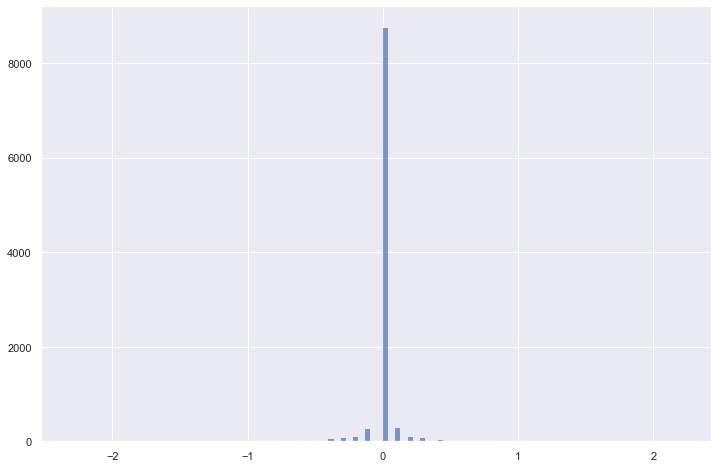

In [117]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

### Model Evaluation

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Linear Regression Model 

#### for data_with_location

In [119]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.35719946892107624
Coefficient of Determination for test data :  0.35815519104485527
Mean Absolute Error :  0.24026687273294506
Mean Squared Error :  0.1012131484570795
Root Mean Squared Error :  0.31814013965087695
R2 Score :  0.35815519104485527


#### for data_with_area

In [120]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.34422351544164764
Coefficient of Determination for test data :  0.3442017563355628
Mean Absolute Error :  0.24307669761574902
Mean Squared Error :  0.10278300226406169
Root Mean Squared Error :  0.32059788250090127
R2 Score :  0.3442017563355628


#### Random Forest Regression Model 

#### for data_with_location

In [121]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9902010498153202
Coefficient of Determination for test data :  0.9434738832626935
Mean Absolute Error :  0.035915982015370544
Mean Squared Error :  0.008913659758888902
Root Mean Squared Error :  0.09441218014053537
R2 Score :  0.9434738832626935


#### for data_with_area

In [122]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9843278206019042
Coefficient of Determination for test data :  0.8875174009553062
Mean Absolute Error :  0.05874203321391742
Mean Squared Error :  0.017629353759285243
Root Mean Squared Error :  0.13277557666711617
R2 Score :  0.8875174009553062


### Decision Tree Regression Model

#### for data_with_location

In [123]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.998763195049567
Coefficient of Determination for test data :  0.9160093419669953
Mean Absolute Error :  0.025401794442194408
Mean Squared Error :  0.01324457068421408
Root Mean Squared Error :  0.1150850584750865
R2 Score :  0.9160093419669953


#### for data_with_area

In [124]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9992833408296304
Coefficient of Determination for test data :  0.827926943996081
Mean Absolute Error :  0.04488130149426587
Mean Squared Error :  0.026968942774242315
Root Mean Squared Error :  0.16422223593119878
R2 Score :  0.827926943996081


- There are three model has been tranied, Linear regression, Random forest regression and Decision tree regression. In this model best model for prediction is Random forest regression model.so we will be using Random forest regression model.                   
- Selected model accuracy is 90% up.

### Save Model

In [113]:
import pickle

In [114]:
with open('rate_pred.pkl', 'wb') as file:
    pickle.dump(rf1, file)